<a href="https://colab.research.google.com/github/DAIvdetango/Data-Analysis--Online-School-CRM/blob/main/Product_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRODUCT ANALYTICS ASSIGNMENT



---



###  Find a point of business growth and formulate a hypothesis for improving the business process to increase metrics and describe their testing mechanics, taking into account that the test should not take more than 2 weeks.





---



## Calculate unit economics by product.

**Key Business Indicator**

Profit: The main indicator that all the company's efforts are focused on.

**Decision-making metrics (unit economics**)

- UA (Users): The number of leads that can potentially become customers.
- B (Bayers): The number of customers who made a purchase.
- C1 (Conversion Rate): Conversion of users into customers.
- AC (Marketing Budget): Total marketing budget.
- CPA (Cost Per Acquisition): The cost of attracting one user.
- CAC (Customer Acquisition Cost): The cost of attracting one customer.
- Gross Revenue (Total Sales): Total revenue from sales.
- AOV (Average Order Value): Average check per purchase.
- APC (Average Purchases per Customer): Average number of purchases per customer.
- CLTV (Customer Lifetime Value): Average gross profit per customer.
- LTV (Lifetime Value): Average gross profit per user.
- CM (Contribution Margin): Contribution margin.
- Total Deals: Total number of successful deals.

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [ ]:
deals = pd.read_excel("/content/Deals (Result) (1).xlsx")
spend = pd.read_excel("/content/Spend (Result) (1).xlsx")

In [ ]:
deals.head()

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,Content,Term,...,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,SLA Seconds
0,5805028000056864695,Ben Hall,NaT,NaN,New Lead,NaN,/eng/test,03.07.23women,v16,women,...,NaN,2024-06-21 15:30:00,NaN,NaN,NaN,NaN,5805028000056849495,NaN,Unknown,NaN
1,5805028000056859489,Ulysses Adams,NaT,NaN,New Lead,NaN,/at-eng,NaN,NaN,NaN,...,Morning,2024-06-21 15:23:00,6.0,NaN,0.0,2000.0,5805028000056834471,NaN,Unknown,NaN
2,5805028000056832357,Ulysses Adams,2024-06-21,D - Non Target,Lost,Non target,/at-eng,engwien_AT,b1-at,21_06_2024,...,NaN,2024-06-21 14:45:00,NaN,NaN,NaN,NaN,5805028000056854421,NaN,Unknown,1603.0
3,5805028000056824246,Eva Kent,2024-06-21,E - Non Qualified,Lost,Invalid number,/eng,04.07.23recentlymoved_DE,bloggersvideo14com,recentlymoved,...,NaN,2024-06-21 13:32:00,NaN,NaN,NaN,NaN,5805028000056889351,NaN,Unknown,3604.0
4,5805028000056873292,Ben Hall,2024-06-21,D - Non Target,Lost,Non target,/eng,discovery_DE,website,NaN,...,NaN,2024-06-21 13:21:00,NaN,NaN,NaN,NaN,5805028000056876176,NaN,Unknown,3192.0


In [ ]:
spend.head()

,Date,Source,Campaign,Impressions,Spend,Clicks,AdGroup,Ad
0,2023-07-03,Google Ads,gen_analyst_DE,6,0.00,0,NaN,NaN
1,2023-07-03,Google Ads,performancemax_eng_DE,4,0.01,1,NaN,NaN
2,2023-07-03,Facebook Ads,03.07.23women,187,3.30,6,women,b3
3,2023-07-03,Facebook Ads,03.07.23women,4,0.02,1,women,b1
4,2023-07-03,Facebook Ads,02.07.23wide_DE,61,0.58,0,wide,b4


### 1. Calculate Unit Economics by Product (Metric Calculation).

### In English:
- Number of deals for each product  
- Number of successful deals for each product (with the status "Payment Done")  
- Total payment amount for successful deals per product  
- Conversion rate for each product

In [ ]:
pd.set_option('display.float_format', '{:,.2f}'.format)

# UA (Users) - количество лидов (юнитов масштабирования)
users = deals.groupby(['Product', 'Education Type'],
                      observed=True)['Id'].nunique().rename('UA')

# B (Bayers) - количество клиентов
bayers = deals[deals['Stage'] == 'Payment Done']\
        .groupby(['Product', 'Education Type'], observed=True
          )['Id'].nunique().rename('Bayers')

# Total Deals (Total successful deals) - количество успешных сделок
total_deals = deals[deals['Stage'] == 'Payment Done']\
        .groupby(['Product', 'Education Type'],
         observed=True)['Id'].count().rename('Total Deals')

# Gross Revenue (Total Sales) - выручка общая
gross_revenue = deals[deals['Stage'] == 'Payment Done']\
         .groupby(['Product', 'Education Type'],
         observed=True)['Offer Total Amount'].sum().rename('Gross Revenue')

merged_df = users.to_frame().join(
    [bayers, total_deals, gross_revenue], how='left').reset_index()

# AC (Marketing Budget) - общий маркетинговый бюджет для всех продуктов
total_ac = spend['Spend'].sum()

merged_df['C1'] = merged_df['Bayers'] / merged_df['UA']
merged_df['AC'] = total_ac
merged_df['CPA'] = merged_df['AC'] / merged_df['UA']
merged_df['CAC'] = merged_df['AC'] / merged_df['Bayers']
merged_df['AOV'] = merged_df['Gross Revenue'] / merged_df['Bayers']
merged_df['APC'] = merged_df['Total Deals'] / merged_df['Bayers']
merged_df['CLTV'] = merged_df['AOV'] * merged_df['APC']
merged_df['LTV'] = merged_df['Gross Revenue'] / merged_df['UA']
merged_df['CM'] = (merged_df['CLTV'] - merged_df['CAC']) * merged_df['Bayers']

merged_df_sorted = merged_df.sort_values(by='Bayers', ascending=False)

merged_df_sorted = merged_df_sorted[['Product', 'Education Type', 'UA',
                                     'Bayers', 'C1', 'AC', 'CPA', 'CAC',
                                     'Gross Revenue', 'AOV', 'APC', 'CLTV',
                                     'LTV', 'CM', 'Total Deals']]

def format_number(value):
    return f'{value:,.0f}'.replace(',', ' ')

formatted_product_education_performance = merged_df_sorted.style.format({
    'UA': format_number,
    'Bayers': format_number,
    'Gross Revenue': format_number,
    'AC': format_number,
    'APC': '{:,.2f}'.format,
    'CAC': format_number,
    'CPA': format_number,
    'AOV': format_number,
    'CLTV': format_number,
    'LTV': format_number,
    'CM': format_number,
    'C1': '{:.2%}'.format,
    'Total Deals': format_number
}).hide(axis='index')

display(formatted_product_education_performance)

Product,Education Type,UA,Bayers,C1,AC,CPA,CAC,Gross Revenue,AOV,APC,CLTV,LTV,CM,Total Deals
Digital Marketing,Morning,1 618,361,22.31%,149 232,92,413,3 522 200,9 757,1.00,9 757,2 177,3 372 968,361
UX/UI Design,Morning,815,170,20.86%,149 232,183,878,1 608 400,9 461,1.00,9 461,1 973,1 459 168,170
Web Developer,Morning,542,137,25.28%,149 232,275,1 089,583 200,4 257,1.00,4 257,1 076,433 968,137
Digital Marketing,Evening,253,113,44.66%,149 232,590,1 321,412 300,3 649,1.00,3 649,1 630,263 068,113
UX/UI Design,Evening,152,57,37.50%,149 232,982,2 618,214 000,3 754,1.00,3 754,1 408,64 768,57
Web Developer,Evening,1,nan,nan%,149 232,149 232,nan,nan,nan,nan,nan,nan,nan,nan


**Key takeaways from unit economics metrics:**

1. **Conversion (C1)**
   - High conversion rates for evening programs (Digital Marketing - 44.66%, UX/UI Design - 37.50%).
   - Morning conversion rates are lower (22.31% for Digital Marketing, 20.86% for UX/UI Design).
   - Web Developer (Morning) shows the highest C1 - 25.28%.

   - **Conclusion:** Evening programs convert leads into customers well, but this doesn’t guarantee profitability.

2. **Customer Acquisition Cost (CPA, CAC)**
   - CPA (Cost per Lead) is higher for evening courses, especially UX/UI Design (Evening) - 982.
   - CAC (Customer Acquisition Cost) is also highest for UX/UI Design (Evening) - 2,618.
   - The lowest CAC is for Digital Marketing (Morning) - 413, making it the most cost-effective product.

   - **Conclusion:** The high CAC for evening programs requires marketing optimization.

3. **Average Order Value (AOV) and Customer Lifetime Value (CLTV)**
   - The highest AOV is for Digital Marketing (Morning) - 9,757.
   - CLTV follows the same trend: Digital Marketing (Morning) - 9,757, with the lowest being Digital Marketing (Evening) - 3,649.
   - Web Developer (Morning) has a low AOV (4,257), reducing profitability.

   - **Conclusion:** Digital Marketing (Morning) is the most profitable product, while Web Developer needs improvement in customer value.

4. **Contribution Margin (CM)**
   - Digital Marketing (Morning) has the highest margin (3,372,968).
   - UX/UI Design (Evening) has a low margin (64б768), indicating inefficiency.
   - Web Developer (Evening) is a complete failure (nan values).

   - **Conclusion:** Focus should be on Digital Marketing (Morning), while evening courses need to be reevaluated.



---



📌 **Key Recommendations:**

- Optimize CAC for UX/UI Design (Evening) and Web Developer (Morning).
- Review evening course marketing - high conversion, but weak CM.
- Close Web Developer (Evening), as the product does not generate revenue.
- Invest in Digital Marketing (Morning), increasing sales through upsell.



---



## Identifying Business Growth Opportunities from Unit Economics

1. **Customer Acquisition Cost (CAC) Optimization**
    * The lowest CAC is for Digital Marketing (Morning) - 413, and the highest is for UX/UI Design (Evening) - 2,618.
    * Web Developer (Morning) - CAC = 1,089, indicating high customer acquisition costs.

   **Growth Opportunity:**
    * Optimize marketing expenses for UX/UI Design (Evening) by testing new traffic sources and improving conversion rates.
    * Reduce CAC for Web Developer (Morning) by improving lead quality or increasing website conversion.

2. **Increase Average Order Value (AOV)**
    * The highest AOV is for Digital Marketing (Morning) - 9,757, and the lowest is for Digital Marketing (Evening) - 3,649.
    * Low AOV reduces overall profit and CLTV.

   **Growth Opportunity:**
    * Add upsell services for Web Developer to increase AOV.
    * Launch discount or package testing for UX/UI Design to boost AOV.

3. **Evening Courses Optimization**
    * High conversion for Digital Marketing (Evening) - 44.66%, but low CLTV (3,649) and weak CM (263,068).
    * UX/UI Design (Evening) has a high conversion (37.50%) but extremely high CAC (2,618).
    * Web Developer (Evening) is a complete failure (nan values).

   **Growth Opportunity:**
    * Cut or reallocate the budget for evening courses.
    * Focus on Digital Marketing (Evening) and reconsider UX/UI Design (Evening) in terms of pricing and marketing.
    * Stop marketing for Web Developer (Evening) if the product isn’t generating revenue.

4. **Increase Repeat Purchases (APC)**
    * APC for all products is 1.00, indicating no repeat purchases.

   **Growth Opportunity:**
    * Add advanced courses and special offers for repeat customers.
    * Launch email marketing with offers for past students.

### 3. Tree of metrics for business.

### Brief Description of Metric Types in the Metric Tree  
1. **North Star Metric (NSM)**  
   - The primary metric reflecting business success. Typically, this is profit or the number of active customers.  
   - In our case: **Profit**.  

2. **Unit Economics Metrics**  
   - Reflect business profitability and customer payback.  
   - Include: **CAC** (Customer Acquisition Cost), **LTV** (Lifetime Value), **AOV** (Average Order Value), **CM** (Contribution Margin).  

3. **Product Metrics**  
   - Characterize user behavior and product effectiveness.  
   - Include: **Number of Clients**, **Conversion Rate**, repeat purchases, user activity.  

4. **Atomic Metrics**  
   - The most basic metrics that form the foundation for others.  
   - Include: **Impressions**, **Clicks**, **Spend**, **SLA** (Response Time), **Quality** (Deal Quality).

### Distributing columns by categories

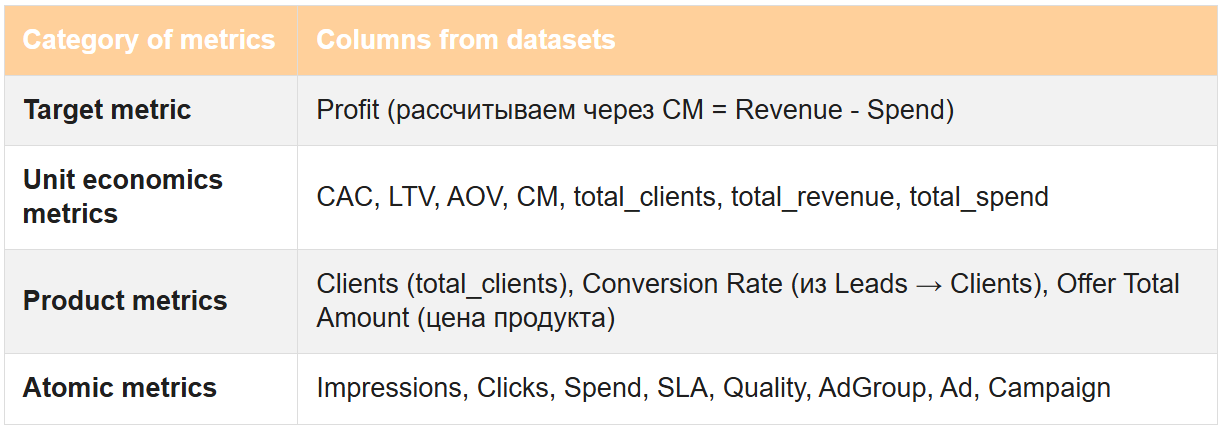



---



### 4. Define target metrics for product improvement and formulate hypotheses.

#### Hypothesis 1: Increasing Average Order Value (AOV)
- **Target Metric:** Average Order Value (AOV)
- **Hypothesis:** If customers are offered additional products (e.g., books, certificates) when purchasing a course, the average order value will increase.
- **Null Hypothesis:** Offering additional products will not lead to any change in the average order value.

#### Hypothesis 2: Reducing Customer Acquisition Cost (CAC)
- **Target Metric:** Customer Acquisition Cost (CAC)
- **Hypothesis:** If advertising campaigns are optimized by targeting more relevant audiences (e.g., through segmentation and ad personalization), the customer acquisition cost (CAC) will decrease by 15%.
- **Null Hypothesis:** Optimizing advertising campaigns will not lead to any change in the customer acquisition cost.

### 5. Describe the method of testing hypotheses with the formulation of the conditions for implementing the hypothesis.

#### Hypothesis 1: Increasing Average Order Value (AOV) - Testing Mechanics  
**Detailed Hypothesis Formulation:**  
- **Control Group:** Customers who are not offered additional products.  
- **Test Group:** Customers who are offered additional products.  

**Metrics:**  
- **Average Order Value (AOV) for Control Group:** $50  
- **Average Order Value (AOV) for Test Group:** $55 (expected 10% increase)  

**A/B Test Plan:**  
1. **Define the Target Metric:** Average Order Value (AOV).  
2. **Audience Segmentation:** Randomly assign customers to the control and test groups.  
3. **Data Collection:** Gather data on order values for both groups during the test period.  
4. **Conduct a t-test:** Compare the mean AOV between the two groups to determine statistical significance.  

**Test Implementation Conditions:**  
- **Test Duration:** 2 weeks.  
- **Sample Size:** 1,000 customers in each group (control and test).  
- **Expected Increase:** 10% in AOV for the test group compared to the control group.  
- **Statistical Significance Threshold:** 0.05 (5%).

#### Testing Mechanics  

**Preparation**  
- Develop additional product offerings.  
- Set up the system to offer these products to customers.  

**Test Execution**  
- Randomly divide customers into control and test groups.  
- The control group receives the standard offering.  
- The test group receives the offering with additional products.  

**Data Collection**  
- Record order value data for both groups over a 2-week period.  

**Data Analysis**  
- Conduct a t-test to compare the mean AOV between the two groups.  
- Analyze the results and draw conclusions.  

**Expected Outcome:**  
- If the hypothesis is correct, a significant increase in AOV will be observed in the test group compared to the control group, confirmed by a t-test with a p-value below 0.05.  
- If the hypothesis is validated, the proposed changes will be rolled out to all customers, leading to an increase in the average order value and, consequently, the business's marginal profit.

In [ ]:
np.random.seed(15)

# Для контрольной группы: среднее значение = 50, стандартное отклонение = 5
control_group = np.random.normal(loc=50, scale=5, size=1000)
# Для тестовой группы: среднее значение = 55, стандартное отклонение = 5
test_group = np.random.normal(loc=55, scale=5, size=1000)

t_stat, p_value = stats.ttest_ind(control_group, test_group)

print(f"t-статистика: {t_stat}")
print(f"p-значение: {p_value}")

if p_value < 0.05:
    print("Отклоняем нулевую гипотезу,\
    есть статистически значимая разница между группами.")
else:
    print("Не можем отклонить нулевую гипотезу,\
    статистически значимой разницы между группами нет.")

t-статистика: -22.382436864898303
p-значение: 3.3939267040934477e-99
Отклоняем нулевую гипотезу,    есть статистически значимая разница между группами.


**Hypothesis 1: Increasing Average Order Value (AOV)**  
- **Target Metric:** Average Order Value (AOV)  
- **Hypothesis:** If customers are offered additional products (e.g., books, certificates) when purchasing a course, the average order value (AOV) will increase by 10%.  
- **Null Hypothesis:** Offering additional products will not lead to any change in the average order value (AOV).  

**Interpretation of the t-test:**  
- The p-value (3.3939267040934477e-99) is significantly lower than the threshold of 0.05.  
- This means we can reject the null hypothesis.  

**Conclusion:**  
Based on the results of the t-test, we reject the null hypothesis, indicating a statistically significant difference between the control and test groups. This confirms that offering additional products during course purchases indeed leads to an increase in the average order value (AOV). Thus, the hypothesis of increasing AOV by 10% through offering additional products is validated.



---



#### **Hypothesis 2: Reducing Customer Acquisition Cost (CAC)**  

**Detailed Hypothesis Formulation**  
- **Control Group:** Advertising campaigns without segmentation and personalization.  
- **Test Group:** Advertising campaigns using segmentation and personalization.  

**Metrics**  
- **Average Customer Acquisition Cost (CAC) for Control Group:** $100  
- **Average Customer Acquisition Cost (CAC) for Test Group:** $85 (expected 15% reduction)  

**A/B Test Plan**  
1. **Define the Target Metric:** Customer Acquisition Cost (CAC).  
2. **Audience Segmentation:** Randomly assign advertising campaigns to the control and test groups.  
3. **Data Collection:** Gather data on acquisition costs and the number of acquired customers for both groups during the test period.  
4. **Conduct a t-test:** Compare the mean CAC between the two groups to determine statistical significance.  

**Test Implementation Conditions**  
- **Test Duration:** 2 weeks.  
- **Sample Size:** 1,000 customers in each group (control and test).  
- **Expected Reduction:** 15% in CAC for the test group compared to the control group.  
- **Statistical Significance Threshold:** 0.05 (5%).

#### Testing Mechanics  

**Preparation**  
- Develop segmentation and personalization strategies for advertising campaigns.  
- Set up the system to separately track costs and results for the control and test groups.  

**Test Execution**  
- Randomly assign advertising campaigns to the control and test groups.  
- The control group continues using current methods without segmentation and personalization.  
- The test group implements the new segmentation and personalization strategies.  

**Data Collection**  
- Record data on customer acquisition costs and the number of acquired customers for both groups over a 2-week period.  

**Data Analysis**  
- Conduct a t-test to compare the mean CAC between the two groups.  
- Analyze the results and draw conclusions.  

**Expected Outcome**  
- If the hypothesis is correct, a significant reduction in CAC will be observed in the test group compared to the control group, confirmed by a t-test with a p-value below 0.05.  
- If the hypothesis is validated, the proposed changes will be rolled out to all advertising campaigns, leading to a reduction in customer acquisition costs and improved efficiency of the marketing budget.

In [ ]:
np.random.seed(15)

# Для контрольной группы: среднее значение = 100, стандартное отклонение = 10
control_group_cac = np.random.normal(loc=100, scale=10, size=1000)
# ДЛя тестовой группы: среднее значение = 85, стандартное отклонение = 10
test_group_cac = np.random.normal(loc=85, scale=10, size=1000)

t_stat, p_value = stats.ttest_ind(control_group_cac, test_group_cac)

print(f"t-статистика: {t_stat}")
print(f"p-значение: {p_value}")

if p_value < 0.05:
    print("Отклоняем нулевую гипотезу,\
    есть статистически значимая разница между группами.")
else:
    print("Не можем отклонить нулевую гипотезу,\
    статистически значимой разницы между группами нет.")

t-статистика: 33.36730873637707
p-значение: 2.039471427841182e-194
Отклоняем нулевую гипотезу,    есть статистически значимая разница между группами.


**Hypothesis 2: Reducing Customer Acquisition Cost (CAC)**  
- **Target Metric:** Customer Acquisition Cost (CAC)  
- **Hypothesis:** If advertising campaigns are optimized by targeting more relevant audiences (e.g., through segmentation and ad personalization), the customer acquisition cost (CAC) will decrease by 15%.  
- **Null Hypothesis:** Optimizing advertising campaigns will not lead to any change in the customer acquisition cost.  

**Interpretation of the t-test:**  
- The p-value (2.039471427841182e-194) is significantly lower than the threshold of 0.05.  
- This means we can reject the null hypothesis.  

**Conclusion:**  
Based on the results of the t-test, we reject the null hypothesis, indicating a statistically significant difference between the control and test groups. This confirms that optimizing advertising campaigns by targeting more relevant audiences indeed leads to a reduction in customer acquisition cost (CAC). Thus, the hypothesis of reducing CAC by 15% through campaign optimization is validated.



---



## General Conclusion on the Product Analytics Block:

During the execution of tasks related to product analytics, the following steps were sequentially addressed:

### 1. Calculating Unit Economics by Product:
- Key unit economics metrics were calculated, including the number of leads (UA), number of customers (B), conversion rate (C1), marketing budget (AC), customer acquisition cost (CAC), average order value (AOV), average number of transactions per customer (APC), average gross profit per customer (CLTV), average gross profit per user (LTV), contribution margin (CM), and total number of successful deals (Total Deals).
- The calculation of these metrics revealed current values and identified key indicators for further analysis and optimization.

### 2. Identifying Business Growth Opportunities from Unit Economics:
- Business growth opportunities were identified based on the analysis of the calculated metrics. Key areas for improvement include:
  - **Increasing Average Order Value (AOV):** The current AOV is 50,000. A 10% increase in this metric could lead to significant revenue growth.
  - **Reducing Customer Acquisition Cost (CAC):** The current CAC is 10,000. A 15% reduction in this metric could significantly improve contribution margin.
- These metrics were selected as growth drivers because they directly impact contribution margin (CM) and the overall financial health of the business.

### 3. Understanding the Metric Tree for the Business:
- A metric tree was created to visualize the relationships between key indicators, such as:
  - **Profit:** The ultimate metric that all improvements aim to enhance.
  - **Revenue:** Includes total income from all sales.
  - **Costs:** Includes all marketing and operational expenses.
  - **Conversion Rate (C1):** The percentage of leads that become customers.
  - **Customer Acquisition Cost (CAC):** The cost of acquiring one customer.
  - **Average Order Value (AOV):** The average revenue per transaction.
  - **Contribution Margin (CM):** The difference between CLTV and CAC multiplied by the number of customers.
- The metric tree helped structure the indicators and understand how changes in one metric can affect others, which is crucial for formulating hypotheses to improve business processes.

### 4. Defining Target Metrics for Product Improvement and Formulating Hypotheses.
### 5. Describing the Hypothesis Testing Methodology with Implementation Conditions.

The t-test results confirm both hypotheses:

1. Increase in AOV: Additional products when purchasing a course contribute to an increase in the average order value.

2. Decrease in CAC: Optimization of advertising campaigns reduces the cost of attracting a client.

Both hypotheses are statistically significant, which confirms the effectiveness of the proposed changes.





---



### Final Conclusion:
The analysis of unit economics and the creation of the metric tree helped identify key growth opportunities for the business. The tested hypotheses demonstrated that increasing the average order value and optimizing advertising campaigns can significantly improve the company's financial performance. These results provide concrete directions for further development and enhancement of business processes.